In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import torch
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
import os

path = '/Users/trung/Research/data/bam/cell_cycle/rna/'
rows = []
for filename in os.listdir(path):
    if filename.endswith('bam'):
        fil_spl = filename.split('_')
        row = {'replicate': fil_spl[2].replace('rep', ''), 'time': fil_spl[3], 'full_path': path + filename}
        rows.append(row)

bam_df = pd.DataFrame.from_records(rows)
bam_df['time'] = bam_df['time'].astype(int)
bam_df['replicate'] = bam_df['replicate'].astype(int)
bam_df = bam_df.sort_values(['replicate', 'time'])
bam_df.head(2)

,replicate,time,full_path
14,1,0,/Users/trung/Research/data/bam/cell_cycle/rna/...
12,1,20,/Users/trung/Research/data/bam/cell_cycle/rna/...


In [24]:
from src.reference_data import read_sgd_orfs
orfs = read_sgd_orfs()
orfs.head(2)

,name,chr,start,stop,length,strand,orf_class,ontology
orf_name,,,,,,,,
YAL069W,YAL069W,1,335,649,315,+,Dubious,"GO:0003674,GO:0005575,GO:0008150"
YAL068W-A,YAL068W-A,1,538,792,255,+,Dubious,"GO:0003674,GO:0005575,GO:0008150"


In [89]:
from src.timer import Timer
from src.read_bam import read_rna_seq
from src.transcription import calculate_read_counts
from src.transcription import convert_to_TPM_all_times
    
def get_read_counts_TPM(replicate_bam):

    timer = Timer()
    all_times_read_counts = orfs[[]].copy()

    for _, row in replicate_bam.iterrows():

        time = row.time
        print(f"Reading BAM file for time {time} minutes")

        rna_reads = read_rna_seq(row.full_path, time, timer)
        orf_reads = calculate_read_counts(orfs, rna_reads)
        all_times_read_counts.loc[:, time] = orf_reads

        timer.print_label(f"Done.")

    TPMs = convert_to_TPM_all_times(all_times_read_counts, orfs['length'])

    return all_times_read_counts, TPMs

In [83]:
replicate_bam = bam_df[bam_df.replicate == 1]
rep1_read_counts, rep1_TPMs = get_read_counts_TPM(replicate_bam)


In [76]:
rep1_read_counts.to_csv('data/cell_cycle_replicate_1_read_counts.csv')
rep1_TPMs.to_csv('data/cell_cycle_replicate_1_TPM.csv')

In [90]:
replicate_bam = bam_df[bam_df.replicate == 2]
rep2_read_counts, rep2_TPMs = get_read_counts_TPM(replicate_bam)


Reading BAM file for time 0 minutes
1..2..3..4..5..6..7..8..9..10..11..12..13..14..15..16..Done. - 00:01:26.08
Reading BAM file for time 10 minutes
1..2..3..4..5..6..7..8..9..10..11..12..13..14..15..16..Done. - 00:02:35.28
Reading BAM file for time 20 minutes
1..2..3..4..5..6..7..8..9..10..11..12..13..14..15..16..Done. - 00:04:17.38
Reading BAM file for time 30 minutes
1..2..3..4..5..6..7..8..9..10..11..12..13..14..15..16..Done. - 00:05:48.56
Reading BAM file for time 40 minutes
1..2..3..4..5..6..7..8..9..10..11..12..13..14..15..16..Done. - 00:07:23.40
Reading BAM file for time 50 minutes
1..2..3..4..5..6..7..8..9..10..11..12..13..14..15..16..Done. - 00:09:14.46
Reading BAM file for time 60 minutes
1..2..3..4..5..6..7..8..9..10..11..12..13..14..15..16..Done. - 00:10:12.12
Reading BAM file for time 70 minutes
1..2..3..4..5..6..7..8..9..10..11..12..13..14..15..16..Done. - 00:12:58.17
Reading BAM file for time 80 minutes
1..2..3..4..5..6..7..8..9..10..11..12..13..14..15..16..Done. - 00:14

In [91]:
rep2_read_counts.to_csv('data/cell_cycle_replicate_2_read_counts.csv')
rep2_TPMs.to_csv('data/cell_cycle_replicate_2_TPM.csv')

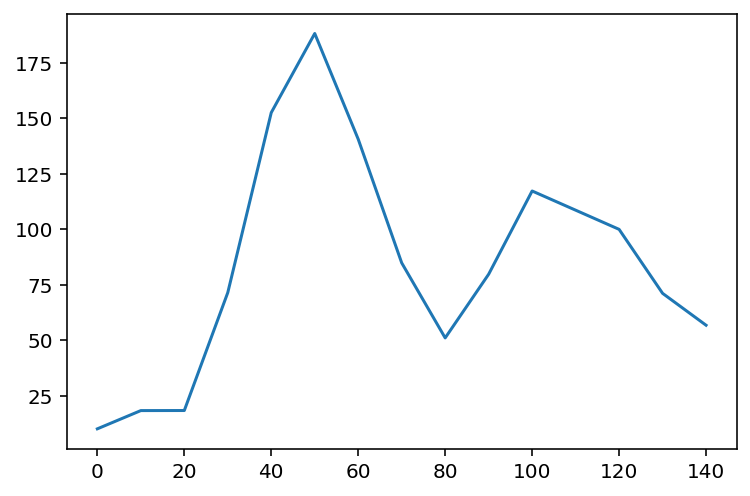

In [92]:
plt.plot(rep2_TPMs.loc['YPR119W'])

In [104]:
# Generate gene mapping to systemtic name and gene list for deconvolution project
mapsys_orfs = orfs[['name']].reset_index()
mapsys_orfs = mapsys_orfs[['name', 'orf_name']]
mapsys_orfs.to_csv('data/for_deconvolution/map2sys2.txt', sep='\t', header=None, index=False)
mapsys_orfs[['orf_name']].to_csv('data/for_deconvolution/gene.lst', sep='\t', header=None, index=False)

In [156]:
rep1_TPMs.loc[[]].to_csv('data/for_deconvolution/wt1_times', sep='\t', index=False)
rep2_TPMs.loc[[]].to_csv('data/for_deconvolution/wt2_times', sep='\t', index=False)

In [112]:
rep1_TPMs.to_csv('data/for_deconvolution/wt1.txt', sep='\t', header=None, index=False)
rep2_TPMs.to_csv('data/for_deconvolution/wt2.txt', sep='\t', header=None, index=False)

In [114]:
rep1_TPMs

,0,20,30,40,50,60,70,80,90,100,110,120,130,140,150
orf_name,,,,,,,,,,,,,,,
YAL069W,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.109591,0.104209,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
YAL068W-A,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
YAL068C,0.113666,0.092928,0.000000,0.100536,0.091609,0.000000,0.000000,0.000000,0.000000,0.000000,0.067208,0.000000,0.000000,0.087451,0.084431
YAL067W-A,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
YAL067C,6.089553,2.877322,8.282799,13.987525,5.878254,2.723113,2.189061,1.657875,2.034434,2.412053,2.300021,3.368789,3.811012,3.349040,2.872213
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YPR201W,2.920516,3.026236,2.237809,2.763372,2.162202,1.480256,1.676343,1.539982,1.875554,2.367122,2.690659,1.995989,2.201918,2.142435,2.825203
YPR202W,0.906306,1.481904,0.853176,0.885995,0.768881,1.059217,1.396816,1.669758,0.878150,1.644190,1.325598,1.378827,1.699378,1.945046,1.629857
YPR203W,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [279]:
""" models.cfg defines how the R, CG1, DG1, postG1 interavals are created.

 Specifically, I don't believe the cfg files are different for 1.1.1.1 and 1.1.1. We use 
     1.1.1.26 where 26 is the alpha value (time for bud release, see the paper for more info)

  
        "1.1.1":{
			"R":[{"i":["-mu0","-alpha","88"]}],
            
			"CG1":[
                {"t":["-alpha","lambda*beta","42"]},
                {"i":["-alpha","lambda*beta","42"]}],
            
			"DG1":[{"b":["-delta-alpha","beta*lambda","42+44"]}]
            "postG1":[
                {"t":["lambda*beta","-alpha+lambda","42"]},
                {"i":["lambda*beta","-alpha+lambda","42"]},
                {"b":["lambda*beta","-alpha+lambda","42"]}],
		},
"""

def create_model_config(filepath):
    params = {}
    with open(filepath, 'r') as f:
        lines = f.readlines()
        for line in lines[1:-1]:
            line_spl = line.split()
            params[line_spl[0]] = float(line_spl[1])

    mu0, lambd, delta, sigma0, sigmav = (params['mu0'], params['lambda'], 
                                         params['delta'], params['sigma0'], params['sigmav'])

    # TODO: Investigate the importance of these values
    alpha = 0
    beta = 0.5

    return (mu0, lambd, delta, sigma0, sigmav, alpha, beta), {
        "R":[{"i":[mu0, -alpha, 88]}],

        "CG1":[
            {"t":[-alpha, lambd*beta, 42]},
            {"i":[-alpha, lambd*beta, 42]}],

        "DG1":[{"b":[-delta-alpha, beta*lambd, 42+44]}],
        "postG1":[
            {"t":[lambd*beta, -alpha+lambd, 42]},
            {"i":[lambd*beta, -alpha+lambd, 42]},
            {"b":[lambd*beta, -alpha+lambd, 42]}],
    }



In [280]:
rep1_post_filepath = '../cloccs/output/output_yl_02_01_18/posteriors.txt'
rep2_post_filepath = '../cloccs/output/output_yl_07_13_18/posteriors.txt'

wt1_params, rep1_model = create_model_config(rep1_post_filepath)
wt2_params, rep2_model = create_model_config(rep2_post_filepath)

In [281]:
def get_sub_interval_str(model):
    subnames = ['R', 'CG1', 'DG1', 'postG1']
    branches = ['i', 't', 'b']

    intervals_str = ""
    for br in branches:
        intervals_str += f"# {br}\n"
        for subname in subnames:

            subintervals = model[subname]
            for subintervals_dict in subintervals:
                k, seq_params = list(subintervals_dict.items())[0]
                if k == br:
                    interval = np.linspace(seq_params[0], seq_params[1], seq_params[2]+1)
                    intervals_str += ' '.join([f"{x:.4f}" for x in interval]) + '\n'
    return intervals_str

In [282]:
def get_model_cfg_str(wt1_params, rep1_model):
    mu0, lambd, delta, sigma0, sigmav, alpha, beta = wt1_params
    rep1_intervals = get_sub_interval_str(rep1_model)

    s = """# lengths
mu0 %f
lambda %f
delta %f
sigma0 %f
sigmav %f
alpha %f
beta %f
# description
R i 0
CG1 i 1 t 0
DG1 b 0
postG1 i 2 t 1 b 1
%s""" % (-mu0, lambd, delta, sigma0, sigmav, alpha, beta, rep1_intervals)

    return s

In [283]:
rep1_model

{'R': [{'i': [-26.248, 0, 88]}],
 'CG1': [{'t': [0, 37.25015, 42]}, {'i': [0, 37.25015, 42]}],
 'DG1': [{'b': [-23.5251, 37.25015, 86]}],
 'postG1': [{'t': [37.25015, 74.5003, 42]},
  {'i': [37.25015, 74.5003, 42]},
  {'b': [37.25015, 74.5003, 42]}]}

In [284]:
wt1_cfg = get_model_cfg_str(wt1_params, rep1_model)
wt2_cfg = get_model_cfg_str(wt2_params, rep2_model)

with open('data/for_deconvolution/wt1.label', 'w') as f:
    f.write(wt1_cfg)
    
with open('data/for_deconvolution/wt2.label', 'w') as f:
    f.write(wt2_cfg)
    